# Data Visualization
# Investigation Precipitation and Temperatre Anomalies

* This script investigates the precipitation and temperature data
* Precipitation and temperature data are uploaded to github repository

* This is modelled after Lesson 10 Time Series

In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import geopandas as gpd
from shapely.geometry import Point, Polygon

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

## Precipitation Anomalies

In [2]:
# import data
# source: https://data.gov.in/catalog/rainfall-india?filters%5Bfield_catalog_reference%5D=1090541&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc
#import os
#os.chdir(r'C:\\Users\\livsh\\Downloads') 
precip = pd.read_csv('monthly precipitation.csv')

**Data Background**
The temperature data is in the form of temperature anomalies (differences from the mean/average value) per month and per season (DJF=Dec-Feb, MAM=Mar-May, etc). We won't be working with absolute temperature data since anomalies are more important than absolute temperature in climate change investigations. A positive anomaly value means that the observed precipitation was greater than the baseline average and a negative anomaly value means that it was less than the baseline average.

In [3]:
precip = precip[(precip['SUBDIVISION']  == 'East Rajasthan')]
len(precip)

117

In [4]:
precip.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
1966,East Rajasthan,1901,21.6,8.9,2.9,0.7,5.0,15.0,164.8,175.6,7.5,9.8,0.0,0.8,412.5,30.5,8.5,362.9,10.6
1967,East Rajasthan,1902,4.1,0.7,0.0,1.8,9.9,34.6,247.6,116.7,145.6,14.4,0.0,2.8,578.3,4.8,11.7,544.5,17.2
1968,East Rajasthan,1903,1.9,0.7,1.3,0.1,12.9,15.6,238.2,229.1,168.5,17.8,0.0,0.0,686.1,2.7,14.2,651.4,17.8
1969,East Rajasthan,1904,4.3,5.5,21.7,0.2,27.5,49.9,289.7,223.5,50.2,1.5,5.8,14.7,694.5,9.8,49.4,613.3,22.0
1970,East Rajasthan,1905,4.1,8.8,3.2,1.6,2.0,14.4,130.5,30.9,83.8,0.0,0.0,0.6,279.8,12.8,6.8,259.6,0.6


In [5]:
# reset index so it is easier to keep track of years/ index
precip = precip.dropna(axis=0, how = 'any') 
#precip.reset_index(inplace = True)
#instructor code
precip.reset_index(inplace = True, drop = True)


print(len(precip))
precip.head()

117


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,East Rajasthan,1901,21.6,8.9,2.9,0.7,5.0,15.0,164.8,175.6,7.5,9.8,0.0,0.8,412.5,30.5,8.5,362.9,10.6
1,East Rajasthan,1902,4.1,0.7,0.0,1.8,9.9,34.6,247.6,116.7,145.6,14.4,0.0,2.8,578.3,4.8,11.7,544.5,17.2
2,East Rajasthan,1903,1.9,0.7,1.3,0.1,12.9,15.6,238.2,229.1,168.5,17.8,0.0,0.0,686.1,2.7,14.2,651.4,17.8
3,East Rajasthan,1904,4.3,5.5,21.7,0.2,27.5,49.9,289.7,223.5,50.2,1.5,5.8,14.7,694.5,9.8,49.4,613.3,22.0
4,East Rajasthan,1905,4.1,8.8,3.2,1.6,2.0,14.4,130.5,30.9,83.8,0.0,0.0,0.6,279.8,12.8,6.8,259.6,0.6


In [6]:
precip.isna().sum() 
# all 0's for each column - so no data is missing

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64

In [7]:
describe = precip.describe().T
describe

,count,mean,std,min,25%,50%,75%,max
YEAR,117.0,1959.000000,33.919021,1901.0,1930.0,1959.0,1988.0,2017.0
JAN,117.0,6.389744,8.172530,0.0,0.7,3.6,8.6,39.2
FEB,117.0,5.328205,7.436592,0.0,0.4,2.2,8.5,35.7
MAR,117.0,4.518803,9.067353,0.0,0.2,1.4,4.1,57.4
APR,117.0,3.096581,5.898582,0.0,0.2,1.0,3.1,43.2
MAY,117.0,9.862393,12.160236,0.0,2.6,5.7,12.7,90.9
JUN,117.0,63.611111,42.703270,5.1,30.8,53.4,89.9,209.1
JUL,117.0,224.824786,84.291405,13.5,164.8,227.8,288.8,440.6
AUG,117.0,219.015385,95.187826,30.9,142.8,223.1,283.7,435.8
SEP,117.0,97.043590,70.360389,3.3,40.4,88.0,131.3,337.2


### DataTime Index
* Create empty dataframe with a DateTime index of monthly frequency and then populate this dataframe using the raw data
* Empty dataframe range from January 1901 to December 2017

In [8]:
# Make a new dataframe with an index for each month
# first create the date range
date_rng = pd.date_range(start='1/1/1901', end='1/1/2018', freq='M')

type(date_rng[0])
### returns 
### pandas._libs.tslibs.timestamps.Timestamp

# then, create the empty DataFrame, which we will populate using the raw data
p = pd.DataFrame(date_rng, columns=['date'])

# Create a column for the anomoly values
p['Avg_Anomaly_mm'] = None

# Set the index of the DataFrame to the date column (DateTime index)
p.set_index('date', inplace=True)

# Show the first few elements
p.head()

# using the last day of each month for the indexes bc we only care about the month

,Avg_Anomaly_mm
date,
1901-01-31,None
1901-02-28,None
1901-03-31,None
1901-04-30,None
1901-05-31,None


### Time series manipulation and dealing with missing values

In [9]:
# select only the data that we want - which is the year column and the month columns, leaving out the season columns
#precip = precip.iloc[:, 2:15]

#instructor code
precip = precip.iloc[:, 1:14]


precip.head()

#instructor code
print(precip.dtypes)
precip['YEAR'] = precip['YEAR'].astype(int)


precip.rename(columns = {'YEAR':'Year', 'JAN':'Jan',
                         'FEB':'Feb', 'MAR':'Mar',
                         'APR':'Apr', 'MAY':'May','JUN':'Jun',
                         'JUL':'Jul', 'AUG':'Aug','SEP':'Sep',
                         'OCT':'Oct', 'NOV':'Nov','DEC':'Dec'}, inplace = True)
print(precip.dtypes)
precip.head()

YEAR      int64
JAN     float64
FEB     float64
MAR     float64
APR     float64
MAY     float64
JUN     float64
JUL     float64
AUG     float64
SEP     float64
OCT     float64
NOV     float64
DEC     float64
dtype: object
Year      int64
Jan     float64
Feb     float64
Mar     float64
Apr     float64
May     float64
Jun     float64
Jul     float64
Aug     float64
Sep     float64
Oct     float64
Nov     float64
Dec     float64
dtype: object


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,21.6,8.9,2.9,0.7,5.0,15.0,164.8,175.6,7.5,9.8,0.0,0.8
1,1902,4.1,0.7,0.0,1.8,9.9,34.6,247.6,116.7,145.6,14.4,0.0,2.8
2,1903,1.9,0.7,1.3,0.1,12.9,15.6,238.2,229.1,168.5,17.8,0.0,0.0
3,1904,4.3,5.5,21.7,0.2,27.5,49.9,289.7,223.5,50.2,1.5,5.8,14.7
4,1905,4.1,8.8,3.2,1.6,2.0,14.4,130.5,30.9,83.8,0.0,0.0,0.6


In [26]:
# apply Panda's function to move through the rows of the raw data (axis =0 for columns, 1 for rows)
# also need to important the datetime and calendar libraries that we are going to use


# Import needed libraries
import calendar
from datetime import datetime

# define function 
def pop_df_with_anomolies_from_row(row):
    year = row['Year'].astype(int) # instructor update
    # anomaly values (appear to be mixture of strings + floats)
    monthly_anomolies = row.iloc[1:]
    # abbreviated month names (index names)
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        # get the last day for each month 
        last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]
        # construct the index with which we can reference our new DataFrame (to populate) 
        date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')
        # populate / set value @ above index, to anomaly value
        p.loc[date_index] = monthly_anomolies[month]

# apply function to each row of raw data 
_ = precip.apply(lambda row: pop_df_with_anomolies_from_row(row), axis=1)

# Show the first few elements of our newly populated DataFrame
print(p)

# instructor edits
p['Avg_Anomaly_mm'] = p['Avg_Anomaly_mm'].astype(float)
print(p.dtypes)

           Avg_Anomaly_mm
date                     
1901-01-31           21.6
1901-02-28            8.9
1901-03-31            2.9
1901-04-30            0.7
1901-05-31              5
...                   ...
2017-08-31          137.3
2017-09-30           46.4
2017-10-31              0
2017-11-30            0.4
2017-12-31            3.4

[1404 rows x 1 columns]
Avg_Anomaly_mm    float64
dtype: object


In [ ]:
# no need to clean anonmaly values since there were no NaN

### Plot the time series

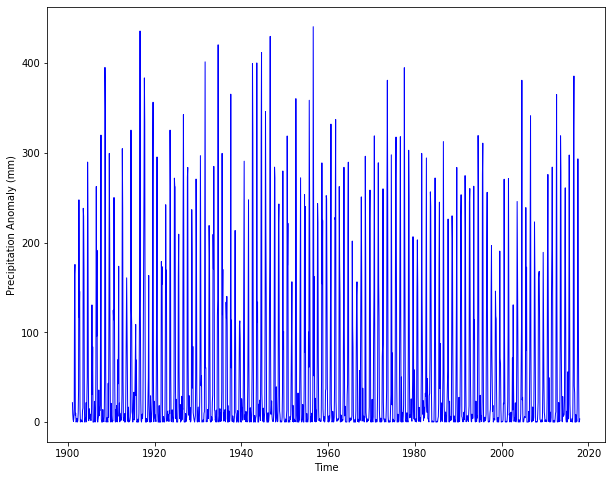

In [27]:
# Plot the data

# import Matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# create figure, title and plot data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Precipitation Anomaly (mm)')
plt.plot(p, color='blue', linewidth=1.0);

* as we move forward in time, ********
* above is granualar data - there is a lot of variation and fluctuation

### Resampling at a different frequency
* the plot above seems messy in a sense that it covers such a logn time span with data that is quite granualar
* the visualization includes a lot of variation
* change the frequency from months to years

In [28]:
p.resample('A').mean().head()   
# trying to remove fluctuations
# takign the average value (mean)
# A represents the year calendar end

,Avg_Anomaly_mm
date,
1901-12-31,34.383333
1902-12-31,48.183333
1903-12-31,57.175000
1904-12-31,57.875000
1905-12-31,23.325000


In [ ]:
# Visualize the resampled DataFrame

# Create figure, title and plot resampled data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Precipitation Anomaly (mm)')
plt.plot(p.resample('A').mean(), color='blue', linewidth=1.0);

## Temperature Anomalies
* this section will investigate temperature anomalies and create similar visualizations that were created for precipitation anomalies

In [ ]:
# import temperature data
# source: https://data.gov.in/resources/monthly-seasonal-and-annual-mean-temp-series-1901-2017
# uploaded temperature data to github

import os
os.chdir(r'C:\\Users\\livsh\\Downloads') 
temp = pd.read_csv('temperature.csv')

In [ ]:
temp.head().T

In [ ]:
temp = temp.dropna(axis=0, how = 'any') 
temp.reset_index(inplace = True)
print(len(temp))  # check length of dataframe
temp.head()

In [ ]:
temp.isna().sum() 
# all 0's for each column - so no data is missing

In [ ]:
describe = temp.describe().T
describe

In [ ]:
# Make a new dataframe with an index for each month
# first create the date range
date_rng = pd.date_range(start='1/1/1880', end='1/7/2019', freq='M')

type(date_rng[0])
### returns 
### pandas._libs.tslibs.timestamps.Timestamp

# then, create the empty DataFrame, which we will populate using the raw data
t = pd.DataFrame(date_rng, columns=['date'])

# Create a column for the anomoly values
t['Avg_Anomaly_deg_C'] = None

# Set the index of the DataFrame to the date column (DateTime index)
t.set_index('date', inplace=True)

# Show the first few elements
t.head()

# using the last day of each month for the indexes bc we only care about the month

In [ ]:
temp = temp.iloc[:,:13]  # only the rows up to the 13th
temp.head()

In [ ]:
# Import needed libraries
import calendar
from datetime import datetime

# define function 
def pop_df_with_anomolies_from_row(row):
    year = row['YEAR']
    # anomaly values (appear to be mixture of strings + floats)
    monthly_anomolies = row.iloc[1:]
    # abbreviated month names (index names)
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        # get the last day for each month 
        last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]
        # construct the index with which we can reference our new DataFrame (to populate) 
        date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')
        # populate / set value @ above index, to anomaly value
        t.loc[date_index] = monthly_anomolies[month]

# apply function to each row of raw data 
_ = temp.apply(lambda row: pop_df_with_anomolies_from_row(row), axis=1)

# Show the first few elements of our newly populated DataFrame
print(t)

In [ ]:
# no need for cleaning up the data since there are no NaN values

#### Plot the data

In [ ]:
# create figure, title and plot data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t, color='blue', linewidth=1.0);

### Resampling at a different frequency

In [ ]:
t.resample('A').mean().head()   
# trying to remove fluctuations
# takign the average value (mean)
# A represents the year calendar end

In [ ]:
# Visualize our resampled DataFrame

# Create figure, title and plot resampled data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t.resample('A').mean(), color='blue', linewidth=1.0)

## Viszualizing
* since the datasets have been formated, can now plot them 
* will used two libraries to plot the data: Matplotlib and Plotly


### Plotting with Matplotlib

In [ ]:
# graph for temperature

# Resample or temperature data to years (end-of-year)
t_resampled = t.resample('A').mean()

# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot temperature data with specific colour and line thickness
ax.plot(t_resampled, color='blue', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Temperature Anomaly (deg. Celsius)',
       title='India Temperature Anomalies from 1901 to 2017')

# set grid
ax.grid()

In [ ]:
# graph for precipitation

# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot co2 emissions data with specific colour and line thickness
ax.plot(e, color='blue', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Precipitation (mm)',
       title='East Rajasthan Precipitation Anomalies from 1901 to 2017')

# Enable grid
ax.grid()

### Plotting with Plotly
* more visualization of the precipitation and temperature anomalies

In [ ]:
# install plotly https://anaconda.org/plotly/plotly
# Standard plotly imports
import plotly.graph_objects as go
from plotly.offline import plot, iplot

In [ ]:
# using plotly and cufflinks for create more visualizations
# no importing for cufflinks

# trace for line plot of temp anomalies
trace1 = go.Scatter(
                    x = t_resampled.index,
                    y = t_resampled.Avg_Anomaly_deg_C,
                    mode = "lines",
                    marker = dict(color = 'blue'))

data = [trace1]
layout = dict(title = 'India Temperature Anomalies from 1901 to 2017',
              xaxis= dict(title= 'Time (years)',ticklen= 5,zeroline= False),
              yaxis=dict(title = 'Temperature Anomaly (deg. Celsius)')
             )
fig = dict(data = data, layout = layout)
iplot(fig)

# have temp anomoly and the month and year

In [ ]:
# trace for line plot of precipitation
trace1 = go.Scatter(
                    x = e.index,
                    y = e.Global_CO2_Emissions_per_Capita,
                    mode = "lines",
                    marker = dict(color = 'blue'))

data = [trace1]
layout = dict(title = 'East Rajasthan Precipitation Anomalies from 1901 to 2017',
              xaxis= dict(title= 'Time (years)',ticklen= 5,zeroline= False),
              yaxis=dict(title = 'Precipitation (mm)')
             )
fig = dict(data = data, layout = layout)
iplot(fig)

***
# Time Series Correlation
## Forcasting using Facebook's Prophet
### Creating, fitting, and plotting a model for Temperature

In [ ]:
conda install -c conda-forge fbprophet

In [ ]:
# import Facebook's Prophet forecasting library
from fbprophet import Prophet

# create a new DataFrame with which we will create/train our Prophet model 
t_prophet = pd.DataFrame()
t_prophet['ds'] = t.index
t_prophet['y'] = t['Avg_Anomaly_deg_C'].values

# instantiate model and fit to data (just like with sklearn model API)
m = Prophet()
m.fit(t_prophet)

# generate future dataframe containing predictions (this is for 100 years into the future)
future = m.make_future_dataframe(freq='m', periods=100*12)
forecast = m.predict(future)

# plot the resulting forecast
m.plot(forecast);

In [ ]:
# Plot the forecast components
m.plot_components(forecast);

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
# Dates where the changepoints occurred
m.changepoints